In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [4]:
weather_df = pd.read_csv('kanpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11.0,21.0,17.0,50.0,0.0,1015.0,11.0,10.0,320.0,10.0
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12.0,22.0,11.0,52.0,0.0,1015.0,11.0,10.0,315.0,11.0
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12.0,23.0,6.0,55.0,0.0,1015.0,11.0,10.0,310.0,11.0
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12.0,23.0,0.0,57.0,0.0,1015.0,10.0,10.0,304.0,12.0
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14.0,19.0,0.0,54.0,0.0,1016.0,11.0,10.0,302.0,11.0


In [5]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [6]:
weather_df.shape

(52761, 24)

In [7]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,52761.000000,52761.000000,52761.0,52761.000000,52761.000000,52761.000000,52761.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000,52760.000000
mean,33.265423,21.438733,0.0,11.072935,6.735202,4.436781,46.229545,13.247612,30.368139,30.524905,28.687585,14.038154,16.064651,45.867646,0.032642,1006.002559,26.836088,9.797536,207.648161,9.351042
std,7.178915,7.762681,0.0,2.149631,1.582634,3.402975,31.255441,8.161623,9.698828,9.536064,8.356413,6.713499,22.732207,23.744288,0.289137,7.578037,8.729522,1.027783,105.735897,4.449764
min,16.000000,3.000000,0.0,4.100000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.000000,4.000000,0.000000,0.000000,2.000000,0.000000,988.000000,3.000000,0.000000,0.000000,0.000000
25%,28.000000,15.000000,0.0,8.700000,5.000000,1.000000,18.000000,7.000000,23.000000,24.000000,23.000000,9.000000,0.000000,26.000000,0.000000,999.000000,20.000000,10.000000,102.000000,6.000000
50%,33.000000,23.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.000000,29.000000,13.000000,5.000000,44.000000,0.000000,1006.000000,27.000000,10.000000,247.000000,9.000000
75%,38.000000,28.000000,0.0,13.100000,8.000000,8.000000,73.000000,21.000000,38.000000,38.000000,34.000000,18.000000,25.000000,64.000000,0.000000,1013.000000,33.000000,10.000000,301.000000,12.000000
max,49.000000,37.000000,0.0,13.900000,10.000000,11.000000,100.000000,31.000000,65.000000,65.000000,54.000000,75.000000,100.000000,100.000000,13.300000,1024.000000,49.000000,10.000000,360.000000,32.000000


In [ ]:
#ISSUE 1: Check for missing values and remove if any.

In [26]:
# ISSUE 2: Find outliers if any and remove them.
from scipy.stats import zscore
z_scores = weather_df[['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'uvIndex.1',
               'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
               'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC',
               'visibility', 'winddirDegree', 'windspeedKmph']].apply(zscore)
outliers = (z_scores > 2) | (z_scores < -2)
outliers = outliers.any(axis=1)
df_no_outliers = weather_df[~outliers]
print("Before removing Outliers ", weather_df.size)
print("After removing Outliers ",df_no_outliers.size)

Before removing Outliers  1319025
After removing Outliers  1271025


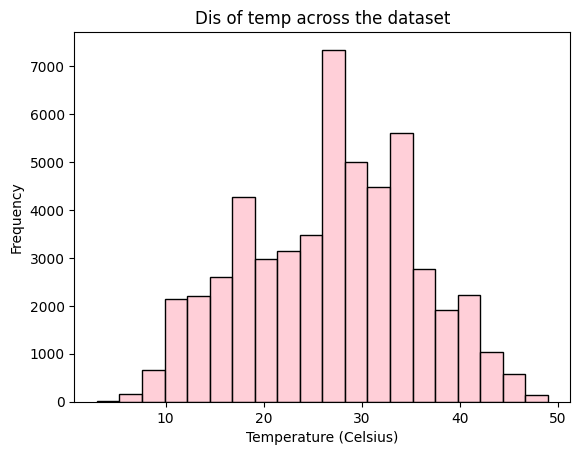

In [32]:
# ISSUE 3: Show the histogram for distribution of temperature.
sns.histplot(weather_df['tempC'], bins = 20,color = 'pink')
plt.title('Dis of temp across the dataset')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# ISSUE 4: Show the trend of rainfall over time using a line plot.

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(weather_df.index, weather_df['precipMM'], color='deepskyblue', marker='o', linestyle='-', linewidth=2)
plt.title('Rainfall Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#ISSUE 5: Scatter plot between heat index and temperature.

import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(data = weather_df, x='tempC', y='HeatIndexC', hue='humidity', palette='RdBu', alpha=0.4)
plt.title("Temperature v/s Heat Index", fontsize = 12)
plt.xlabel("Temperature (Celsius)", fontsize = 10)
plt.ylabel("Heat Index (Celsius)", fontsize = 10)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# ISSUE 6: A scatter plot between Minimum Temperature vs Temperature

import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(data = weather_df, x='tempC', y='mintempC')
plt.title("Minimum Temperature vs Temperature", fontsize = 15)
plt.xlabel("Temperature (Celsius)", fontsize = 10)
plt.ylabel("Minimum Temperature(Celsius)", fontsize = 10)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# ISSUE 7: Create a Heatmap for this.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns
non_numeric_cols = weather_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop time-related columns before computing correlation
weather_numeric_df = weather_df.drop(columns=['moonrise', 'moonset', 'sunrise', 'sunset', 'uvIndex.1','totalSnow_cm'], errors='ignore')

# Convert remaining numeric-looking columns
for col in weather_numeric_df.columns:
    weather_numeric_df[col] = pd.to_numeric(weather_numeric_df[col], errors='coerce')

# Compute correlation only for numeric values
plt.figure(figsize=(12, 8))
sns.heatmap(weather_numeric_df.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Weather Variables")
plt.show()



In [ ]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

# Shape of new dataframe

In [ ]:
weather_df_num.shape

# Columns in new dataframe

In [ ]:
weather_df_num.columns

## Ploting all the column values

In [ ]:
weather_df_num.plot(subplots=True, figsize=(25,20))

# Ploting all the column values for 1 year

In [ ]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

In [ ]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [ ]:
train_X.shape

In [ ]:
train_y.shape

In [ ]:
train_y.head()

In [ ]:
model=LinearRegression()
model.fit(train_X,train_y)

In [ ]:
prediction = model.predict(test_X)

In [ ]:
#calculating error
np.mean(np.absolute(prediction-test_y))

In [ ]:
print('Variance score: %.2f' % model.score(test_X, test_y))

In [ ]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

In [ ]:
#ISSUE 7: Apply Decision tree Regression model

In [ ]:
# ISSUE 8: Calculate the R-2 Score for Decision Tree Regression

In [ ]:
#ISSUE 9: Apply Random Forest Regressor.

In [ ]:
# ISSUE 10:Calculate R-2 Score for Random Forest and compare with that of decision tree.